In [4]:
import h5py
import random
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

from Functions.image_preprocessing import *

In [2]:
PATH_3D_H5 = 'D:/tof_data_128_112_40.hdf5'

def decode_data(string):
    decoded_string = [n.decode("UTF-8", "ignore") for n in string]
    return(decoded_string)

with h5py.File(PATH_3D_H5, 'r') as h5:
    print('H5-file: ', list(h5.keys()))
    
    # Image matrices
    X = h5["X"][:]
    # Patient ID's
    pat = h5["pat"][:]
    # Path to images
    path = decode_data(h5["path"][:])
    # Patient labels (1=stroke, 0=TIA)
    Y_pat = h5["stroke"][:]
    
print(len(X), len(Y_pat), len(pat), len(path))

H5-file:  ['X', 'pat', 'path', 'stroke']
508 508 508 508


#### Expand dimensions

In [3]:
X = np.expand_dims(X, axis = 4)
X.shape

(508, 128, 112, 40, 1)

#### Values between 0 and 255

In [5]:
X_norm = np.empty_like(X)

for i in range(X.shape[0]):
    X_norm[i] = normalize(X[i])  
    
print(X_norm.shape, X_norm.min(), X_norm.max())

(508, 128, 112, 40, 1) 0 255


#### Z-Standardization

In [6]:
X_normz = np.array([z_normalize(img) for img in X_norm])
print(X_normz.shape, X_normz.min(), X_normz.max(), X_normz.mean(), X_normz.std())

(508, 128, 112, 40, 1) -1.5907471988589987 26.031565772467758 2.1324024910545048e-18 0.9999999999999966


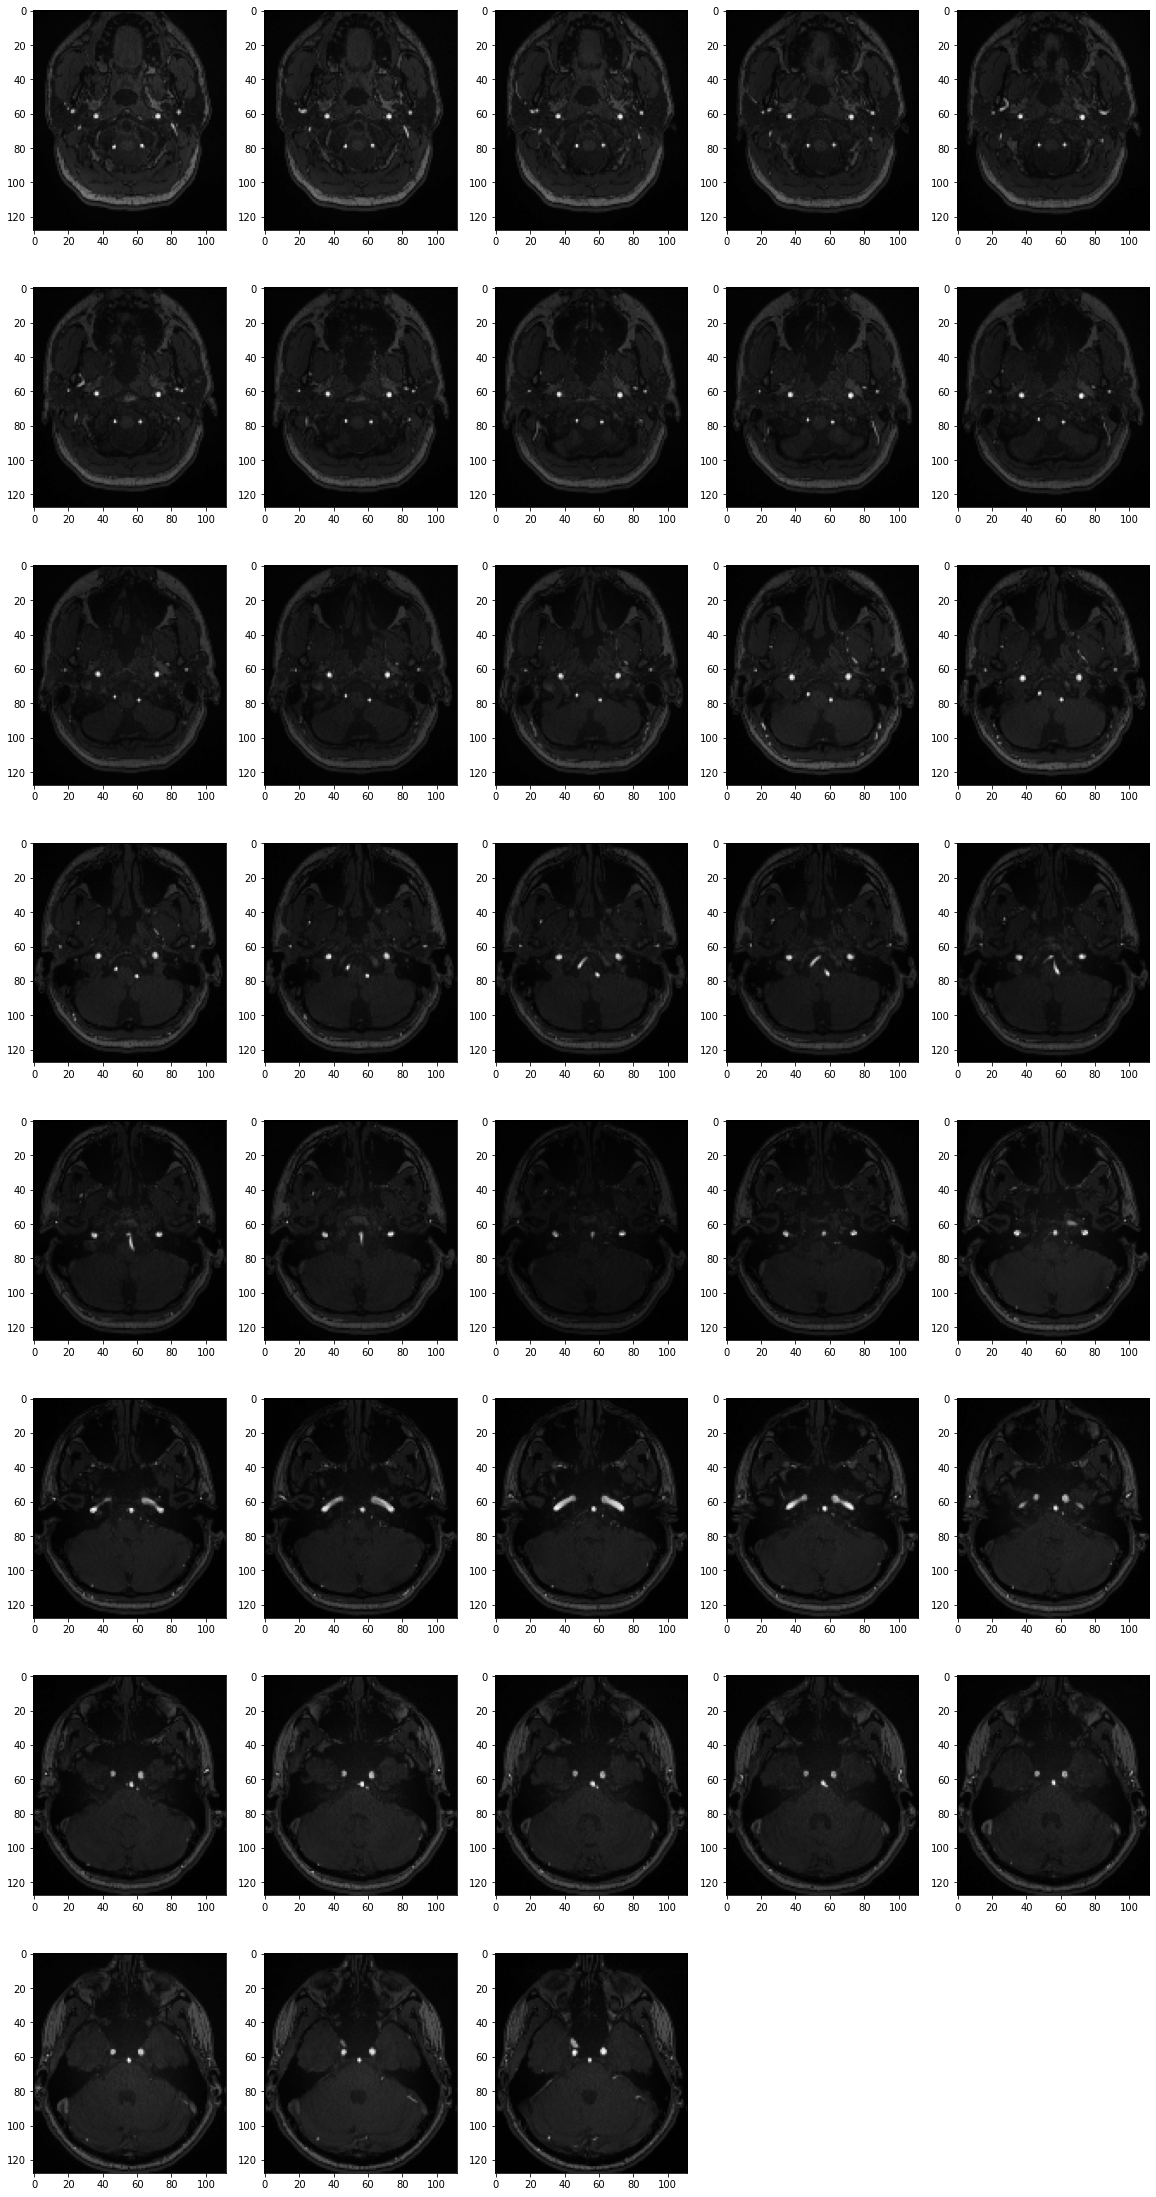

In [8]:
fig = plt.figure(figsize = (20, 40)) # total figure size (including all subplots)
fig_all = []
img = np.squeeze(X_normz[0], axis = 3)
for i in range(1, 39):
    image = img[:,:,i]
    fig_all.append(fig.add_subplot(8, 5, i))
    plt.imshow(image, cmap = 'gray')
plt.show()

#### Save in hdf5 file

In [8]:
# save the preprocessed data
with h5py.File('Images/preprocessed_data_128_112_40_all.hdf5', "w") as h5:
    h5.create_dataset("X", data = X_normz)
    h5.create_dataset("Y_pat", data = Y_pat)
    h5.create_dataset("pat", data = pat)